<a href="https://colab.research.google.com/github/thobui1308/streamlit-vietnam-highschool-exam/blob/main/Practice_two_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preprocessing

##Import libraries

In [1]:
import pandas as pd
import numpy as np

## Read Data

In [2]:
file_path_1= '/content/drive/MyDrive/Colab Notebooks/Practice two/2017-2021.csv'
df1 = pd.read_csv(file_path_1)
df1.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8


In [3]:
file_path_2= '/content/drive/MyDrive/Colab Notebooks/Practice two/Tinh.csv'
df2 = pd.read_csv(file_path_2)
df2.head()

,MaTinh,TenTinh
0,1,THÀNH PHỐ HÀ NỘI
1,2,THÀNH PHỐ HỒ CHÍ MINH
2,3,THÀNH PHỐ HẢI PHÒNG
3,4,THÀNH PHỐ ĐÀ NẴNG
4,5,TỈNH HÀ GIANG


## Merge Data

In [4]:
df = pd.merge(df1, df2, how='inner', on='MaTinh')

df.head(10)

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh,TenTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
5,8001882,3.2,5.75,NaN,NaN,3.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
6,8003558,4.6,6.00,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
7,8004936,4.0,5.75,NaN,NaN,2.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
8,8001749,1.4,3.50,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
9,8000321,4.2,6.75,4.75,4.5,4.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI


In [5]:
df.shape

(4199188, 13)

Dataset contains **4,199,188** rows and **13** columns.

## Create new features

This code is essentially creating new columns in a DataFrame to represent different combinations of subjects that students typically take in the Vietnamese education system.

In [6]:
df['KhoiA'] = df.apply(lambda row: row['Toan'] + row['Ly'] + row['Hoa'] if pd.notnull(row['Toan']) and pd.notnull(row['Ly']) and pd.notnull(row['Hoa']) else np.nan, axis=1)
df['KhoiA1'] = df.apply(lambda row: row['Toan'] + row['Ly'] + row['Ngoai ngu'] if pd.notnull(row['Toan']) and pd.notnull(row['Ly']) and pd.notnull(row['Ngoai ngu']) else np.nan, axis=1)
df['KhoiB'] = df.apply(lambda row: row['Toan'] + row['Hoa'] + row['Sinh'] if pd.notnull(row['Toan']) and pd.notnull(row['Hoa']) and pd.notnull(row['Sinh']) else np.nan, axis=1)
df['KhoiC'] = df.apply(lambda row: row['Van'] + row['Lich su'] + row['Dia ly'] if pd.notnull(row['Van']) and pd.notnull(row['Lich su']) and pd.notnull(row['Dia ly']) else np.nan, axis=1)
df['KhoiD'] = df.apply(lambda row: row['Toan'] + row['Van'] + row['Ngoai ngu'] if pd.notnull(row['Toan']) and pd.notnull(row['Van']) and pd.notnull(row['Ngoai ngu']) else np.nan, axis=1)
df['KHTN'] = df.apply(lambda row: row['Ly'] + row['Hoa'] + row['Sinh'] if pd.notnull(row['Ly']) and pd.notnull(row['Hoa']) and pd.notnull(row['Sinh']) else np.nan, axis=1)
df['KHXH'] = df.apply(lambda row: row['Lich su'] + row['Dia ly'] + row['GDCD'] if pd.notnull(row['Lich su']) and pd.notnull(row['Dia ly']) and pd.notnull(row['GDCD']) else np.nan, axis=1)

In [7]:
df.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh,TenTinh,KhoiA,KhoiA1,KhoiB,KhoiC,KhoiD,KHTN,KHXH
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,21.50,NaN,NaN,22.25,NaN,NaN
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,8.95,NaN,NaN,9.45,NaN,NaN
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,16.05,NaN,NaN
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,11.20,NaN,NaN


In the Vietnamese high school education system, students are often required to choose a specific combination of subjects based on their interests or career aspirations.

*   **Khoi A (BlockA)**: This combination typically includes subjects related to natural sciences. It consists of ***Math, Physics, and Chemistry***. Students who aim for engineering, science, or medical fields usually opt for this combination.
*   **Khoi A1 (BlockA1)**: Similar to Khoi A but with a variation. It includes ***Math, Physics, and a Foreign Language (usually English)***. This variation is often chosen by students interested in technical or scientific fields who also prioritize proficiency in English.
*   **Khoi B (BlockB)**: This combination focuses on subjects related to biology and is often chosen by students interested in life sciences or medical studies. It comprises ***Math, Chemistry, and Biology.***
*   **Khoi C (BlockC)**: This combination emphasizes subjects related to social sciences and humanities. It typically includes ***Literature, History, and Geography.*** Students interested in fields like law, social sciences, or humanities usually opt for this combination.
*   ***Khoi D (BlockD):*** This combination is a mix of subjects from both natural sciences and social sciences/humanities. It includes ***Math, Literature, and a Foreign Language (usually English)***. It provides a balanced approach and is chosen by students with varied interests or those unsure about their career paths.

And, we use KHTN and KHXH as combinations used for graduation evaluation:
*   **KHTN (Natural Sciences)**: This combination, known as the Natural Sciences Group, comprises ***Physics, Chemistry, and Biology.*** It's designed for students undergoing graduation evaluation who have chosen to focus on natural sciences.
*   ***KHXH (Social Sciences)***: This combination, known as the Social Sciences and Humanities Group, includes ***History, Geography, and Civic Education.*** It's intended for students undergoing graduation evaluation who have selected subjects from the social sciences and humanities.

In [8]:
df.shape

(4199188, 20)

##Rename

In [9]:
column_mapping = {
    'SBD': 'StudentID',
    'Toan': 'Math',
    'Van': 'Literature',
    'Ly': 'Physics',
    'Sinh': 'Biology',
    'Ngoai ngu': 'ForeignLanguage',
    'Year': 'Year',
    'Hoa': 'Chemistry',
    'Lich su': 'History',
    'Dia ly': 'Geography',
    'GDCD': 'CivicEducation',
    'MaTinh': 'ProvinceCode',
    'TenTinh': 'ProvinceName',
    'KhoiA': 'BlockA',
    'KhoiA1': 'BlockA1',
    'KhoiB': 'BlockB',
    'KhoiC': 'BlockC',
    'KhoiD': 'BlockD',
    'KHTN': 'NaturalSciences',
    'KHXH': 'SocialSciences'
}

df.rename(columns=column_mapping, inplace=True)
df.head()

,StudentID,Math,Literature,Physics,Biology,ForeignLanguage,Year,Chemistry,History,Geography,CivicEducation,ProvinceCode,ProvinceName,BlockA,BlockA1,BlockB,BlockC,BlockD,NaturalSciences,SocialSciences
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,21.50,NaN,NaN,22.25,NaN,NaN
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,8.95,NaN,NaN,9.45,NaN,NaN
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,16.05,NaN,NaN
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,NaN,NaN,NaN,NaN,11.20,NaN,NaN


# Missing Value

In [10]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['Math', 'Literature', 'Physics', 'Biology', 'ForeignLanguage',
       'Chemistry', 'History', 'Geography', 'CivicEducation', 'BlockA',
       'BlockA1', 'BlockB', 'BlockC', 'BlockD', 'NaturalSciences',
       'SocialSciences'],
      dtype='object')


In [11]:
# Calculate the total number of missing values in the DataFrame
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

# Calculate the percentage of missing data
total = np.product(df.shape)
percent_missing = (total_missing / total) * 100

# Calculate the percentage of missing data for each column
missing_percentages = df.isna().mean() * 100

# Create a DataFrame from missing_values_count and missing_percentages
result_df = pd.concat([missing_values_count, missing_percentages], axis=1)
result_df.columns = ['MissingValues', 'MissingPercentage']

print(result_df)
print(f'Total number of missing values:  {total_missing}')
print(f'The percentage of missing values: {round(percent_missing, 2)}%')


                 MissingValues  MissingPercentage
StudentID                    0           0.000000
Math                     38633           0.920011
Literature               92255           2.196972
Physics                2564225          61.064782
Biology                2586825          61.602981
ForeignLanguage         499929          11.905373
Year                         0           0.000000
Chemistry              2949226          70.233245
History                2054376          48.923173
Geography              2093149          49.846518
CivicEducation         2375559          56.571866
ProvinceCode                 0           0.000000
ProvinceName                 0           0.000000
BlockA                 2967151          70.660113
BlockA1                2643511          62.952909
BlockB                 2971402          70.761347
BlockC                 2095095          49.892860
BlockD                  518943          12.358175
NaturalSciences        2988878          71.177523


The columns containing missing values are all score columns. Here, almost every row contains one or many null values, resulting in a significant amount of missing data. **However, each missing value corresponds to an actual absence of score in the dataset, *so we cannot drop any rows*.**

# Memory Optimization and Data Type Conversion

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199188 entries, 0 to 4199187
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   StudentID        int64  
 1   Math             float64
 2   Literature       float64
 3   Physics          float64
 4   Biology          float64
 5   ForeignLanguage  float64
 6   Year             int64  
 7   Chemistry        float64
 8   History          float64
 9   Geography        float64
 10  CivicEducation   float64
 11  ProvinceCode     int64  
 12  ProvinceName     object 
 13  BlockA           float64
 14  BlockA1          float64
 15  BlockB           float64
 16  BlockC           float64
 17  BlockD           float64
 18  NaturalSciences  float64
 19  SocialSciences   float64
dtypes: float64(16), int64(3), object(1)
memory usage: 672.8+ MB


Because the dataset is quite large and we cannot move any missing data as each missing data carries specific significance, we need to explore alternative methods to optimize memory usage, such as:
1.   **Using appropriate data types:** Utilizing suitable data types such as int8, int16, float16, float32 instead of int64, float64 to reduce memory usage.
2.   *Reading data in chunks:* For large datasets, reading data in chunks and processing them incrementally instead of loading the entire dataset into memory at once.
3.   *Optimizing computational operations:* Employing efficient computational methods and avoiding unnecessary calculations can help reduce memory overhead during data processing.
4.   *Using sparse matrices:* For datasets where most values are zeros, employing sparse matrices can significantly reduce memory usage.

In [30]:
# Convert columns StudentID, ProvinceCode, and Year to string
df['StudentID'] = df['StudentID'].astype(str)
df['ProvinceCode'] = df['ProvinceCode'].astype(str)
df['Year'] = df['Year'].astype(str)

# Convert score columns to float32
columns_to_convert = ['Math', 'Literature', 'Physics', 'Biology', 'ForeignLanguage', 'Chemistry', 'History', 'Geography', 'CivicEducation', 'BlockA', 'BlockA1', 'BlockB', 'BlockC', 'BlockD', 'NaturalSciences', 'SocialSciences']
for col in columns_to_convert:
    df[col] = df[col].astype('float32')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199188 entries, 0 to 4199187
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   StudentID        object 
 1   Math             float32
 2   Literature       float32
 3   Physics          float32
 4   Biology          float32
 5   ForeignLanguage  float32
 6   Year             object 
 7   Chemistry        float32
 8   History          float32
 9   Geography        float32
 10  CivicEducation   float32
 11  ProvinceCode     object 
 12  ProvinceName     object 
 13  BlockA           float32
 14  BlockA1          float32
 15  BlockB           float32
 16  BlockC           float32
 17  BlockD           float32
 18  NaturalSciences  float32
 19  SocialSciences   float32
dtypes: float32(16), object(4)
memory usage: 416.5+ MB


I will apply the method of converting to appropriate formats to *optimize memory* as well as to *correct the formats* of other columns.

# Descriptive statistics

In [31]:
description = df.describe()
description_rounded = description.round(2)
description_rounded

,Math,Literature,Physics,Biology,ForeignLanguage,Chemistry,History,Geography,CivicEducation,BlockA,BlockA1,BlockB,BlockC,BlockD,NaturalSciences,SocialSciences
count,4160555.00,4106933.00,1634963.00,1612363.00,3699259.00,1249962.00,2144812.00,2106039.00,1823629.00,1232037.00,1555677.00,1227786.00,2104093.00,3680245.00,1210310.00,1822898.00
mean,5.83,5.92,5.80,5.01,4.66,5.88,4.62,6.36,7.80,18.90,17.93,18.05,16.91,16.71,16.91,18.93
std,1.89,1.46,1.71,1.43,1.98,1.77,1.63,1.34,1.29,4.29,4.37,3.88,3.78,4.26,3.84,3.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.40,5.00,4.50,4.00,3.20,4.50,3.50,5.50,7.00,16.05,14.85,15.40,14.25,13.60,14.25,16.50
50%,6.00,6.00,6.00,5.00,4.20,6.00,4.25,6.50,8.00,19.34,18.05,18.20,16.75,16.50,17.00,19.00
75%,7.40,7.00,7.25,5.75,5.80,7.25,5.50,7.25,8.75,22.20,21.16,20.91,19.50,19.75,19.75,21.50
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,29.75,29.55,30.00,29.25,29.16,29.50,30.00


First, a summary of statistics for each column in the DataFrame, including count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value. ***By printing out the minimum and maximum values, we can also check if there are any errors in data entry.***

In [16]:
# total number of candidates
total_candidates = len(df)

subjects = ['Math', 'Literature', 'ForeignLanguage', 'Chemistry', 'Biology', 'Physics', 'History', 'Geography', 'CivicEducation']

# the number of students achieving a score of 10 and its percentage
total_score_10 = df[subjects].apply(lambda x: (x == 10).any(), axis=1).sum()
percent_score_10 = (total_score_10 / total_candidates) * 100

# the number of exams failing and its percentage
total_failed = df[subjects].apply(lambda x: (x <= 1).any(), axis=1).sum()
percent_failed = (total_failed / total_candidates) * 100

# the number of students who did not complete the exam and its percentage
num_incomplete = ((df['BlockD'].isnull()) & (df[['NaturalSciences', 'SocialSciences']].isnull().all(axis=1))).sum()
percent_incomplete = (num_incomplete / total_candidates) * 100

# DataFrame to store the results
result_df = pd.DataFrame({
    'Total Candidates': [total_candidates],
    'Total Score 10': [total_score_10],
    'Percentage Score 10': [percent_score_10],
    'Total Failed': [total_failed],
    'Percentage Failed': [percent_failed],
    'Total incomplete' : [num_incomplete],
    'Percentage incomlete' : [percent_incomplete]
})

# In kết quả
result_df

,Total Candidates,Total Score 10,Percentage Score 10,Total Failed,Percentage Failed,Total incomplete,Percentage incomlete
0,4199188,30285,0.721211,13811,0.328897,479451,11.417707



There are a basic statistics but must important for high school graduation exams. Over the five-year from 2017-2021, there were a total of over ***4 milions*** students, with ***30,285 perfect scores***, accounting for *0.72%*, and ***13,811 candidates failing to graduate (due to failing grades)***, accounting for *0.32%*. Additionally, approximately **479,451 candidates withdrew from the exam or retook it**, which accounts for *11.417%* of the total.

# Data Visualization

## Boxplot: Comparison of score

A boxplot is commonly used to ***compare the distributions of different data groups.*** It provides a concise summary of the descriptive statistics of the dataset.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

###Subject

<ipython-input-18-354d829784b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=subject, ax=ax, palette="Set3")
<ipython-input-18-354d829784b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=subject, ax=ax, palette="Set3")
<ipython-input-18-354d829784b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=subject, ax=ax, palette="Set3")
<ipython-input-18-354d829784b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

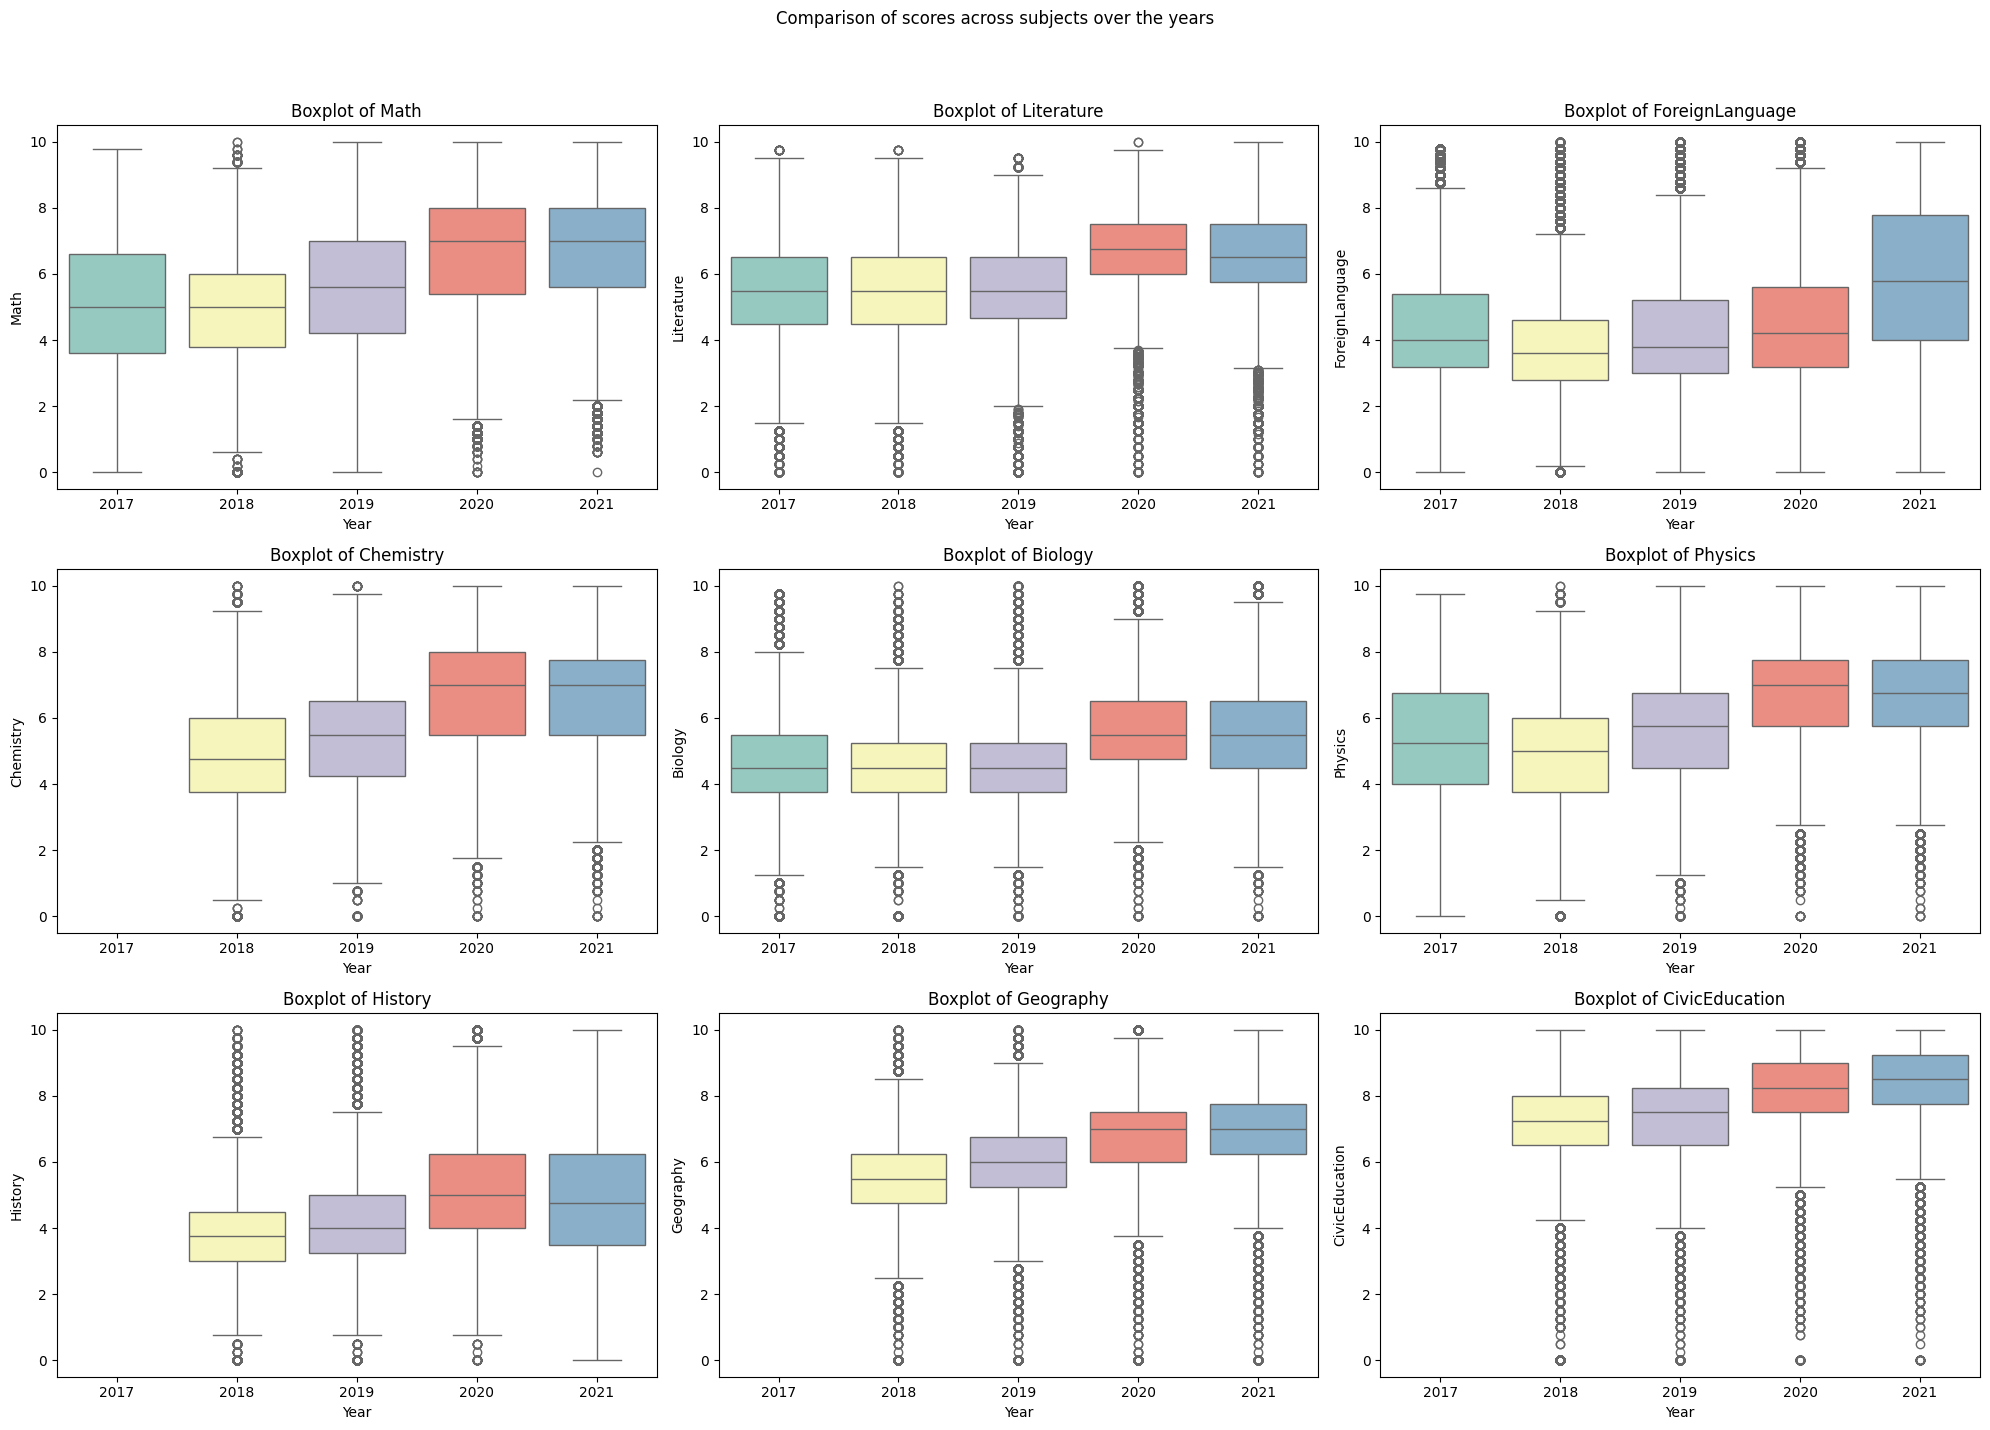

In [18]:
# List of subjects
subjects = ['Math', 'Literature', 'ForeignLanguage', 'Chemistry', 'Biology', 'Physics', 'History', 'Geography', 'CivicEducation']

# Create a figure and an array of axes with 9 subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Comparison of scores across subjects over the years')

for i, subject in enumerate(subjects):
    ax = axes[i//3, i%3]
    # boxplot
    sns.boxplot(data=df, x='Year', y=subject, ax=ax, palette="Set3")
    ax.set_title(f'Boxplot of {subject}')

# Adjust the layout to have some space between the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



###Block

<ipython-input-19-7caa6540ebb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=block, ax=ax, palette="Set3")
<ipython-input-19-7caa6540ebb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=block, ax=ax, palette="Set3")
<ipython-input-19-7caa6540ebb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y=block, ax=ax, palette="Set3")
<ipython-input-19-7caa6540ebb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

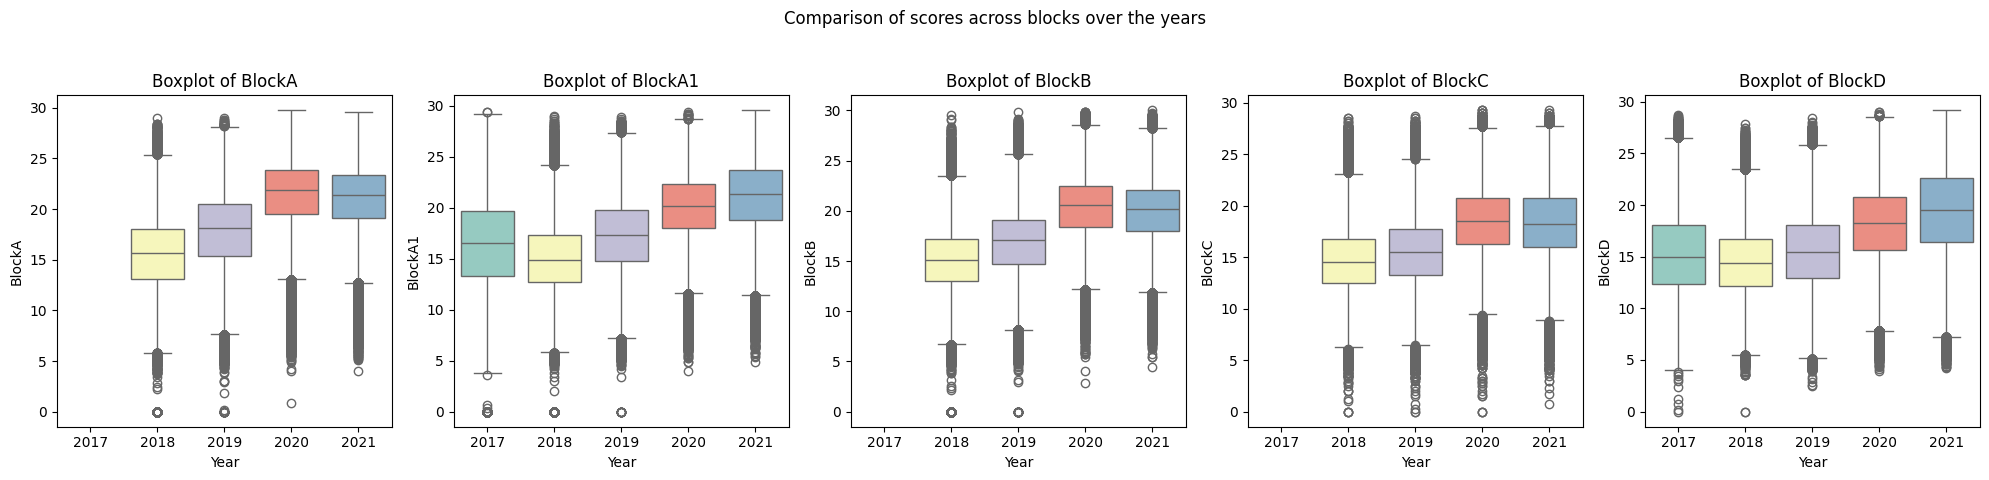

In [19]:
# List of blocks
blocks = ['BlockA', 'BlockA1', 'BlockB', 'BlockC', 'BlockD']

# Create a figure and array of axes with 5 subplots (1x5)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Comparison of scores across blocks over the years')

for i, block in enumerate(blocks):
    ax = axes[i]

    # boxplot
    sns.boxplot(data=df, x='Year', y=block, ax=ax, palette="Set3")
    ax.set_title(f'Boxplot of {block}')

# Adjust the layout to have some space between the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


## KDE: Comparison of subject score

*If only using boxplots, it would summarize the data and lack the ability to display detailed information about the shape of the data distribution.* Therefore, using a distribution plot like KDE helps to represent the distribution in more detail.

###Subject

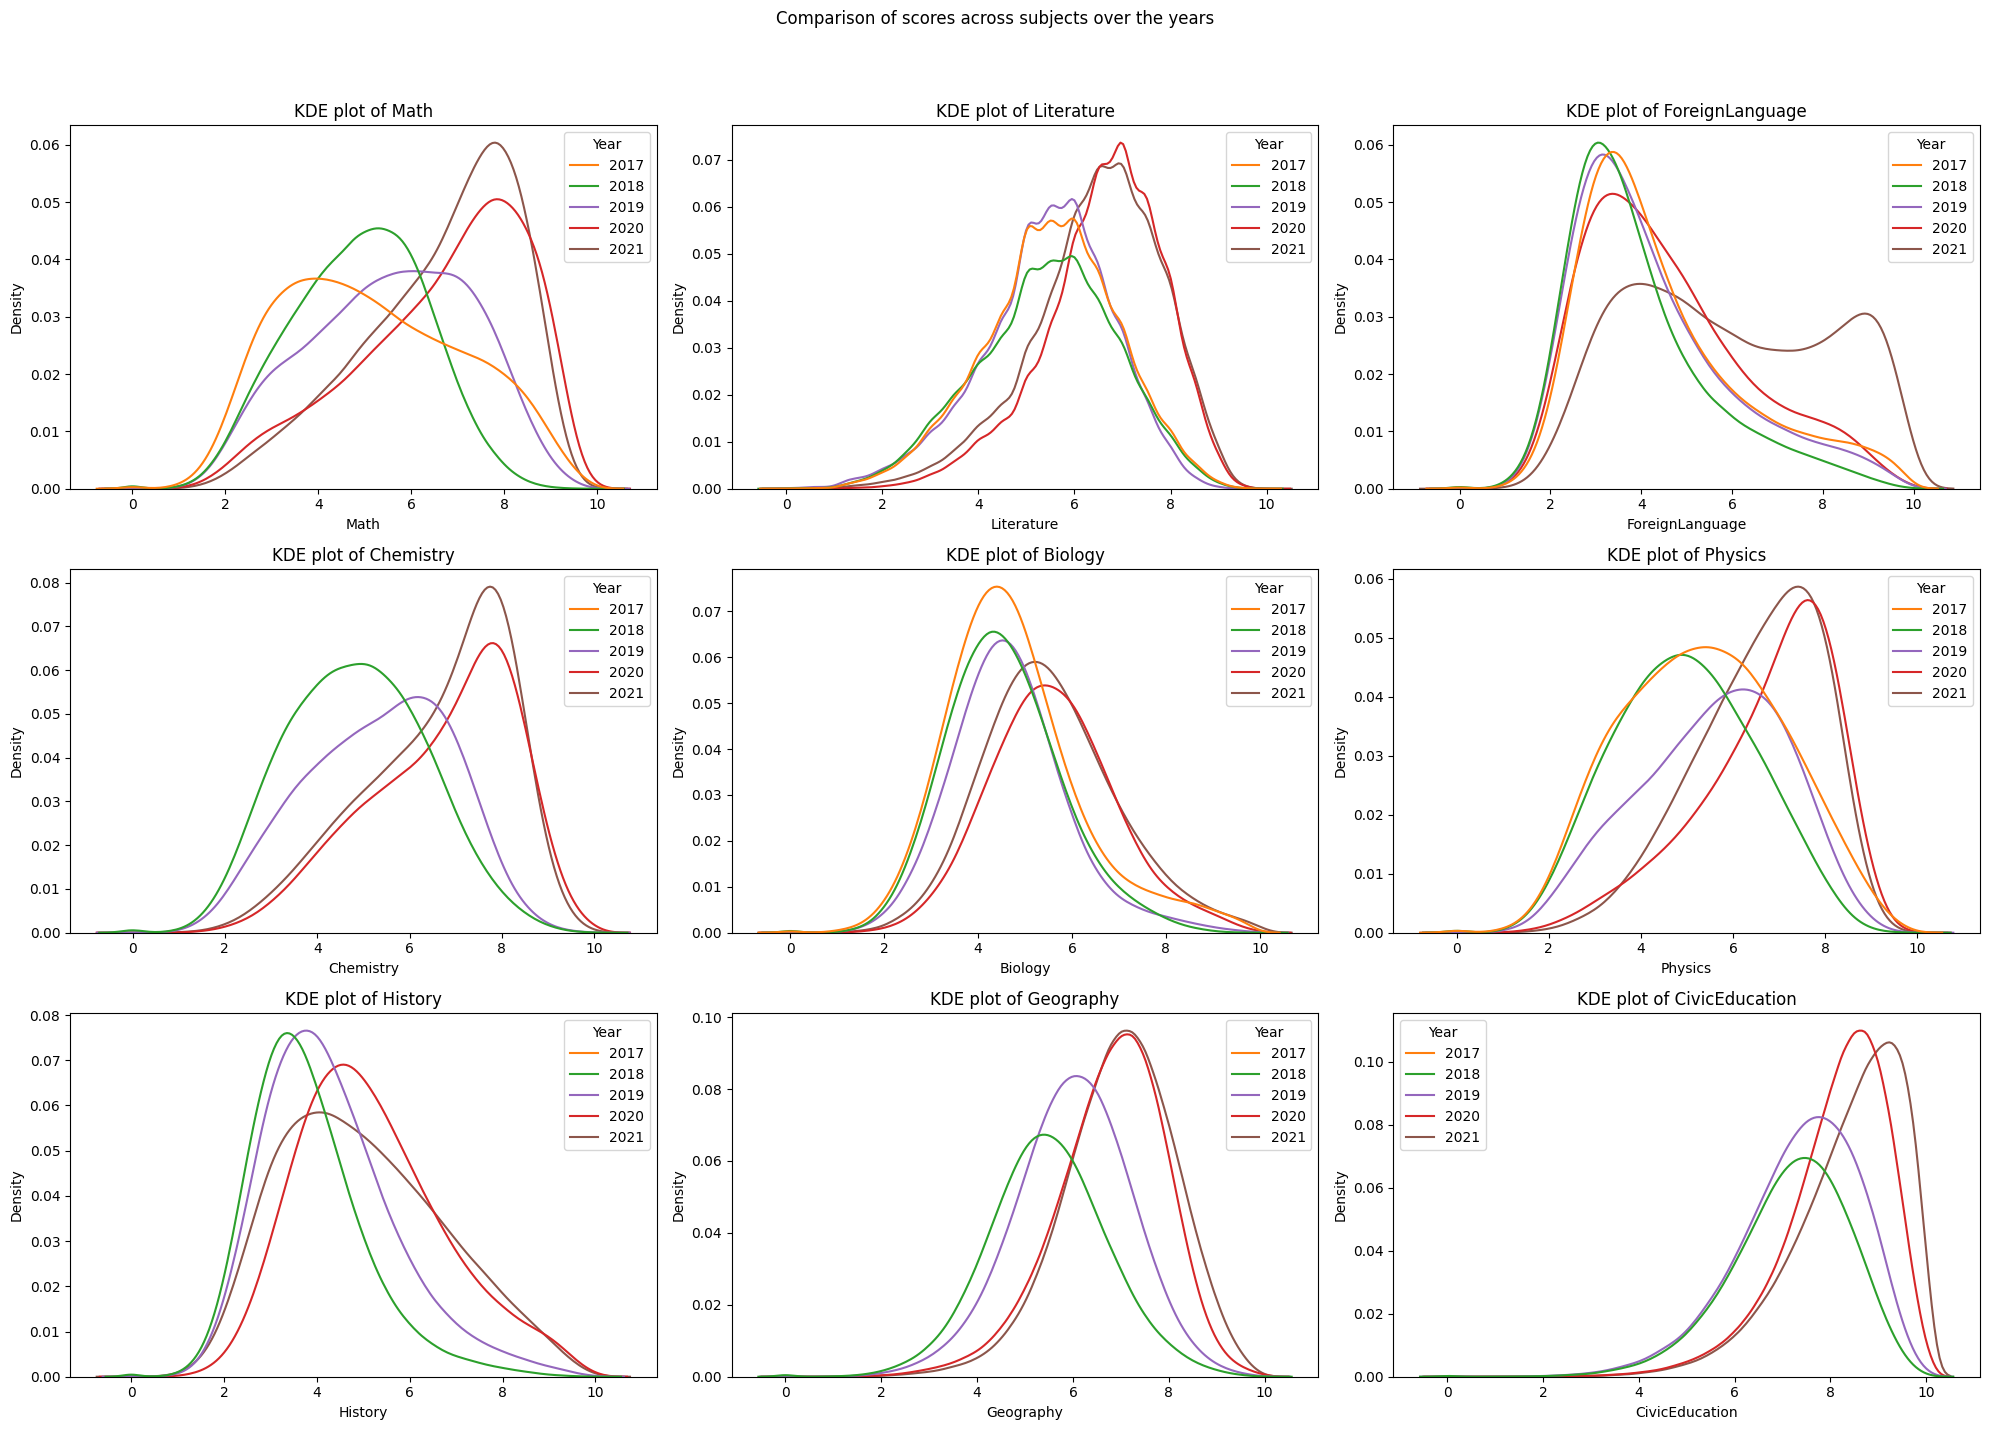

In [20]:
# List of subjects
subjects = ['Math', 'Literature', 'ForeignLanguage', 'Chemistry', 'Biology', 'Physics', 'History', 'Geography', 'CivicEducation']

# Create a figure and an array of axes with 9 subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Comparison of scores across subjects over the years')

for i, subject in enumerate(subjects):
    ax = axes[i//3, i%3]

    # KDE
    sns.kdeplot(data=df, x=subject, hue='Year', bw_adjust=2, palette=["C1", "C2", "C4", "C3", "C5"], ax=ax)
    ax.set_title(f'KDE plot of {subject}')

# Adjust the layout to have some space between the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


###Block

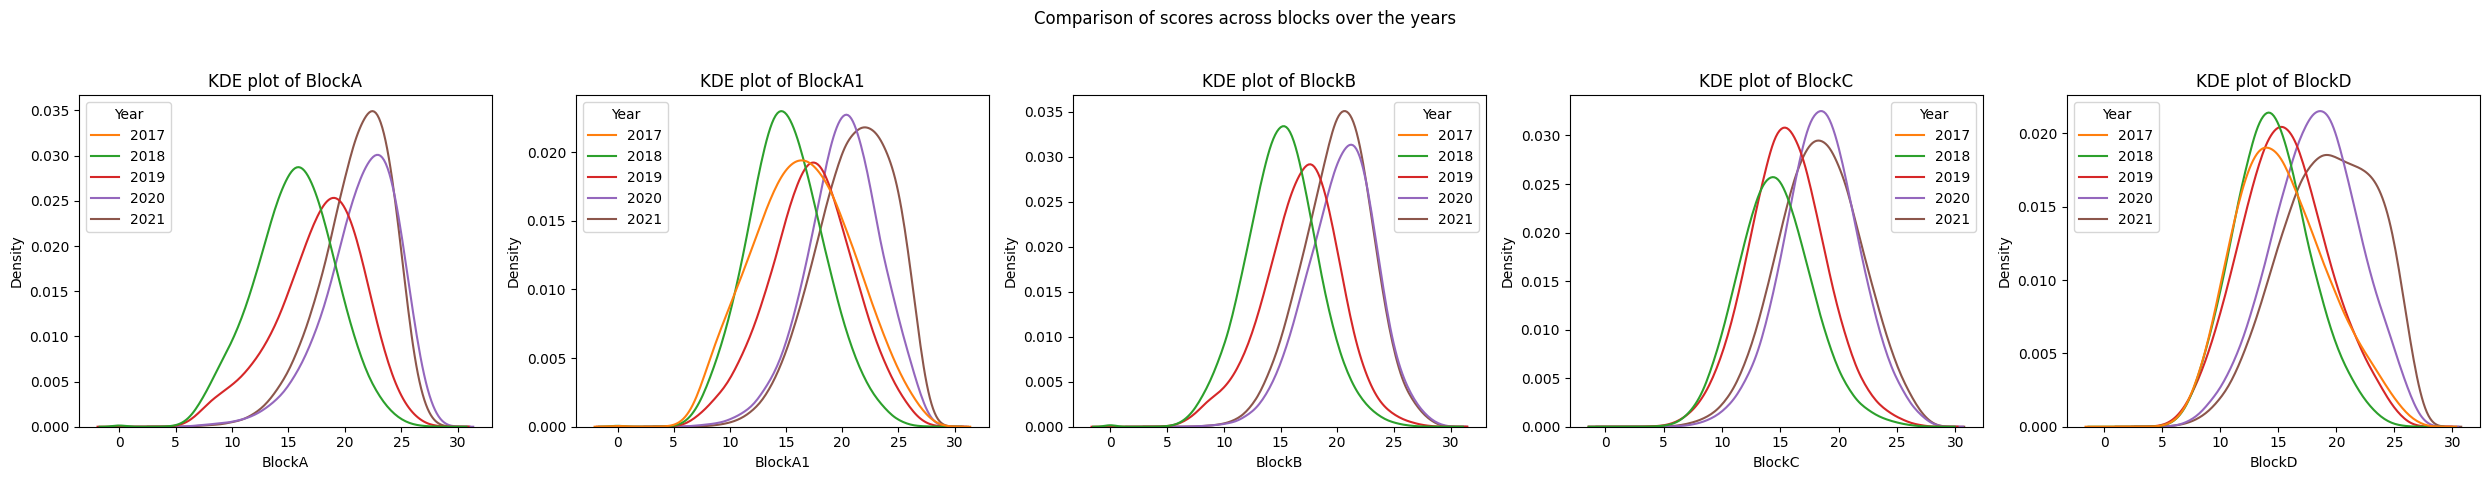

In [21]:
# List of blocks
blocks = ['BlockA', 'BlockA1', 'BlockB', 'BlockC', 'BlockD']

# Create a figure and an array of axes with 5 subplots (1x5)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Comparison of scores across blocks over the years')

for i, block in enumerate(blocks):
    ax = axes[i]

    # KDE
    sns.kdeplot(data=df, x=block, hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C5"], ax=ax)
    ax.set_title(f'KDE plot of {block}')

# Adjust the layout to have some space between the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


Based on the charts above, we can see and compare the scores of each subject and group over the years from 2017 to 2021. It's clear that ***the data for 2017 has many missing parts***, like scores for Physics, History, Geography, and Civic Education, which makes it hard to evaluate the related groups and graduation.

# Data preprocessing for Streamlit dashboard

## Data for Overview Dashboard

### Filtering the data and narrowing the scope

In [32]:
# Filter out the candidates who took the exam in 2017 and did not complete the high school graduation exam
df_filtered = df[(df['Year'] != '2017') & (df['BlockD'].notnull()) & ((df['NaturalSciences'].notnull()) | (df['SocialSciences'].notnull()))]

df_filtered.head(5)

,StudentID,Math,Literature,Physics,Biology,ForeignLanguage,Year,Chemistry,History,Geography,CivicEducation,ProvinceCode,ProvinceName,BlockA,BlockA1,BlockB,BlockC,BlockD,NaturalSciences,SocialSciences
5895,8000295,2.599609,5.00,NaN,NaN,2.800781,2018,NaN,3.25,4.00,5.50,8,TỈNH LÀO CAI,NaN,NaN,NaN,12.25,10.398438,NaN,12.75
5896,8000300,3.199219,4.00,NaN,NaN,1.400391,2018,NaN,2.50,4.50,6.25,8,TỈNH LÀO CAI,NaN,NaN,NaN,11.00,8.601562,NaN,13.25
5897,8000309,5.601562,5.25,NaN,NaN,3.000000,2018,NaN,4.00,5.50,9.25,8,TỈNH LÀO CAI,NaN,NaN,NaN,14.75,13.851562,NaN,18.75
5898,8000312,4.199219,5.25,NaN,NaN,2.400391,2018,NaN,3.25,4.00,6.75,8,TỈNH LÀO CAI,NaN,NaN,NaN,12.50,11.851562,NaN,14.00
5899,8000317,3.800781,6.25,NaN,NaN,3.599609,2018,NaN,4.25,6.25,7.75,8,TỈNH LÀO CAI,NaN,NaN,NaN,16.75,13.648438,NaN,18.25


In [33]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938232 entries, 5895 to 4199187
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   StudentID        object 
 1   Math             float32
 2   Literature       float32
 3   Physics          float32
 4   Biology          float32
 5   ForeignLanguage  float32
 6   Year             object 
 7   Chemistry        float32
 8   History          float32
 9   Geography        float32
 10  CivicEducation   float32
 11  ProvinceCode     object 
 12  ProvinceName     object 
 13  BlockA           float32
 14  BlockA1          float32
 15  BlockB           float32
 16  BlockC           float32
 17  BlockD           float32
 18  NaturalSciences  float32
 19  SocialSciences   float32
dtypes: float32(16), object(4)
memory usage: 291.4+ MB


Before proceeding to the sampling method, I prioritize narrowing **down the scope** *by filtering the data for the year 2017 and only selecting those candidates who have completed the full process of the national high school graduation exam*, **because I prefer not to delete any data**.

However, the dataset is still too large for Streamlit, so I'll need to implement sampling methods.

### Sampling the data: Stratified Sampling

***Stratified Sampling*** involves dividing the population into smaller, more homogeneous groups called strata. Then, It takes samples from each of these strata in proportion to their size in the population. This ensures that we cab get a representative sample that accurately ***reflects the characteristics of the entire population.***

In [34]:
# total number of rows of data
population_size = len(df_filtered)

# choose sample size
sample_size = 1000000

# sample ratio
sampling_ratio = sample_size / population_size

#Calculate the number of samples to take from each subgroup (stratum)
counts_per_year = df_filtered['Year'].value_counts()
stratum_sizes = counts_per_year.values
sample_sizes_per_stratum = (sampling_ratio * stratum_sizes).astype(int)

# Sampling
samples = []
for year, size in zip(counts_per_year.index, sample_sizes_per_stratum):
    stratum_sample = df_filtered[df_filtered['Year'] == year].sample(n=size, random_state=42)
    samples.append(stratum_sample)

sampled_data = pd.concat(samples)

print("Number of samples taken from each stratum:")
print(sample_sizes_per_stratum)
print("\nSampled data size:")
print(len(sampled_data))

Number of samples taken from each stratum:
[273556 259061 245855 221526]

Sampled data size:
999998


In [35]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999998 entries, 613907 to 949249
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StudentID        999998 non-null  object 
 1   Math             999998 non-null  float32
 2   Literature       999998 non-null  float32
 3   Physics          401818 non-null  float32
 4   Biology          401812 non-null  float32
 5   ForeignLanguage  999998 non-null  float32
 6   Year             999998 non-null  object 
 7   Chemistry        401817 non-null  float32
 8   History          617030 non-null  float32
 9   Geography        617026 non-null  float32
 10  CivicEducation   616944 non-null  float32
 11  ProvinceCode     999998 non-null  object 
 12  ProvinceName     999998 non-null  object 
 13  BlockA           401816 non-null  float32
 14  BlockA1          401818 non-null  float32
 15  BlockB           401812 non-null  float32
 16  BlockC           617026 non-null 

In [ ]:
sampled_data.to_parquet('df_sample.parquet')

##Data for detail dashboard

###2017

In [ ]:
df_2017 = df[df['Year'] == '2017']
df_2017.shape

(847348, 20)

In [ ]:
df_2017.to_parquet('df_2017.parquet')

###2018

In [ ]:
df_2018 = df[df['Year'] == '2018']
df_2018.shape

(744396, 20)

In [ ]:
df_2018.to_parquet('df_2018.parquet')

###2019

In [ ]:
df_2019 = df[df['Year'] == '2019']
df_2019.shape

(811851, 20)

In [ ]:
df_2019.to_parquet('df_2019.parquet')

###2020

In [ ]:
df_2020 = df[df['Year'] == '2020']
df_2020.shape

(870486, 20)

In [ ]:
df_2020.to_parquet('df_2020.parquet')

###2021

In [ ]:
df_2021 = df[df['Year'] == '2021']
df_2021.shape

(925107, 20)

In [ ]:
df_2021.to_parquet('df_2021.parquet')